In [304]:
import pandas as pd
import numpy as np
from statistics import geometric_mean

import seaborn as sns
import matplotlib.pyplot as plt

from collections import OrderedDict
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_X_y

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [305]:
# import set1,2 for ml
ml = pd.read_csv('ml.csv')
ml = ml.drop(['Unnamed: 0'], axis = 1)
ml

NAME  RANDOM SEED  TIME W/ CUTS  \
0                        10teams.mps.gz            2     10.703114   
1                        10teams.mps.gz            4     10.612878   
2                        10teams.mps.gz            8     10.696199   
3                        10teams.mps.gz           16     10.505375   
4                        10teams.mps.gz           32     10.543100   
5                          22433.mps.gz            2      2.879640   
6                          22433.mps.gz            4      2.885082   
7                          22433.mps.gz            8      2.926255   
8                          22433.mps.gz           16      2.877262   
9                          22433.mps.gz           32      2.906032   
10                         23588.mps.gz            2      4.955615   
11                         23588.mps.gz            4      4.999079   
12                         23588.mps.gz            8      4.948153   
13                         23588.mps.gz           16      5.095594   
14                         23588.mps.gz           32      5.068528   
15               30_70_45_05_100.mps.gz            2    298.609909   
16               30_70_45_05_100.mps.gz            4    305.366806   
17               30_70_45_05_100.mps.gz            8    303.519996   
18               30_70_45_05_100.mps.gz           16    305.662712   
19               30_70_45_05_100.mps.gz           32    305.169922   
20              30_70_45_095_100.mps.gz            2    877.533328   
21              30_70_45_095_100.mps.gz            4    882.143294   
22              30_70_45_095_100.mps.gz            8    880.737718   
23              30_70_45_095_100.mps.gz           16    816.819331   
24              30_70_45_095_100.mps.gz           32    819.284740   
25               30_70_45_095_98.mps.gz            2     69.955694   
26               30_70_45_095_98.mps.gz            4     73.107282   
27               30_70_45_095_98.mps.gz            8     72.893989   
28               30_70_45_095_98.mps.gz           16     73.054656   
29               30_70_45_095_98.mps.gz           32     73.270904   
30                       30n20b8.mps.gz            2    173.301270   
31                       30n20b8.mps.gz            4    173.439038   
32                       30n20b8.mps.gz            8    172.683289   
33                       30n20b8.mps.gz           16    180.190327   
34                       30n20b8.mps.gz           32    179.806002   
35                         Test3.mps.gz            2      8.172098   
36                         Test3.mps.gz            4      8.169023   
37                         Test3.mps.gz            8      8.169711   
38                         Test3.mps.gz           16      8.172038   
39                         Test3.mps.gz           32      8.172219   
40                   ab51-40-100.mps.gz            2    807.061599   
41                   ab51-40-100.mps.gz            4    808.512860   
42                   ab51-40-100.mps.gz            8    808.115688   
43                   ab51-40-100.mps.gz           16    810.304308   
44                   ab51-40-100.mps.gz           32    808.684581   
45                   ab67-40-100.mps.gz            2    314.041278   
46                   ab67-40-100.mps.gz            4    314.149197   
47                   ab67-40-100.mps.gz            8    313.746639   
48                   ab67-40-100.mps.gz           16    314.399390   
49                   ab67-40-100.mps.gz           32    313.978909   
50                   ab69-40-100.mps.gz            2    398.358564   
51                   ab69-40-100.mps.gz            4    398.294842   
52                   ab69-40-100.mps.gz            8    398.307474   
53                   ab69-40-100.mps.gz           16    398.498496   
54                   ab69-40-100.mps.gz           32    398.494323   
55                   ab71-20-100.mps.gz            2    199.228980   
56                   ab71-20-100.mps.gz      

In [306]:
# take average values for all instances, reducing set to 426
ml = ml.groupby('NAME').mean()
ml = ml.reset_index()
ml

NAME  RANDOM SEED  TIME W/ CUTS  \
0                       10teams.mps.gz         12.4     10.612133   
1                         22433.mps.gz         12.4      2.894854   
2                         23588.mps.gz         12.4      5.013394   
3               30_70_45_05_100.mps.gz         12.4    303.665869   
4              30_70_45_095_100.mps.gz         12.4    855.303682   
5               30_70_45_095_98.mps.gz         12.4     72.456505   
6                       30n20b8.mps.gz         12.4    175.883985   
7                         Test3.mps.gz         12.4      8.171018   
8                   ab51-40-100.mps.gz         12.4    808.535807   
9                   ab67-40-100.mps.gz         12.4    314.063083   
10                  ab69-40-100.mps.gz         12.4    398.390740   
11                  ab71-20-100.mps.gz         12.4    199.478331   
12                  ab72-40-100.mps.gz         12.4    669.115438   
13                   acc-tight2.mps.gz         12.4     19.537959   
14                   acc-tight4.mps.gz         12.4    229.533662   
15                   acc-tight5.mps.gz         12.4    288.468046   
16                     aflow30a.mps.gz         12.4     32.080764   
17                     aflow40b.mps.gz         12.4    960.851272   
18                        air03.mps.gz         12.4      2.941141   
19                        air04.mps.gz         12.4     71.479078   
20                        air05.mps.gz         12.4     57.406171   
21                     aligninq.mps.gz         12.4     44.738780   
22                       app1-1.mps.gz         12.4      8.058875   
23                       app1-2.mps.gz         12.4   1647.768072   
24                       app2-1.mps.gz         12.4      0.436521   
25                       app2-2.mps.gz         12.4      1.582760   
26                         app3.mps.gz         12.4      5.519012   
27                      arki001.mps.gz         12.4  18000.738472   
28            australia-abs-cta.mps.gz         12.4    359.743878   
29                         bab5.mps.gz         12.4  17866.586073   
30                           bc.mps.gz         12.4    590.333638   
31                          bc1.mps.gz         12.4    173.260363   
32                    beasleyC1.mps.gz         12.4      6.386580   
33                       beavma.mps.gz         12.4      1.579558   
34                      biella1.mps.gz         12.4   1142.029275   
35                      bienst1.mps.gz         12.4    211.259832   
36                      bienst2.mps.gz         12.4    791.217683   
37                   binkar10_1.mps.gz         12.4     60.465656   
38                       blend2.mps.gz         12.4      2.815102   
39                     bley_xl1.mps.gz         12.4     26.672666   
40                     blp-ir98.mps.gz         12.4    172.188033   
41                       bmocbd.mps.gz         12.4     61.768359   
42                      bmocbd2.mps.gz         12.4     61.062760   
43                     bnatt400.mps.gz         12.4    278.494363   
44                     bppc8-02.mps.gz         12.4      0.862453   
45     breastcancer-regularized.mps.gz         12.4   3586.779344   
46                      cap6000.mps.gz         12.4      5.206707   
47                      cbs-cta.mps.gz         12.4     39.827878   
48          chromaticindex128-5.mps.gz         12.4     85.960954   
49          chromaticindex256-8.mps.gz         12.4    302.398539   
50           chromaticindex32-8.mps.gz         12.4      1.235525   
51          chromaticindex512-7.mps.gz         12.4   6847.223667   
52                        ci-s4.mps.gz         12.4    197.124920   
53                       co-100.mps.gz         12.4   9705.921982   
54                       cod105.mps.gz         12.4     96.675520   
55                  comp08-2idx.mps.gz         12.4   1227.035528   
56                 core2536-691.mps.gz         12.4    382.012868   
57                    csched007.

In [307]:
ml['TIME W/O CUTS'] = ml['TIME W/O CUTS'] + ml['TIME FIRST ROUND']
ml

NAME  RANDOM SEED  TIME W/ CUTS  \
0                       10teams.mps.gz         12.4     10.612133   
1                         22433.mps.gz         12.4      2.894854   
2                         23588.mps.gz         12.4      5.013394   
3               30_70_45_05_100.mps.gz         12.4    303.665869   
4              30_70_45_095_100.mps.gz         12.4    855.303682   
5               30_70_45_095_98.mps.gz         12.4     72.456505   
6                       30n20b8.mps.gz         12.4    175.883985   
7                         Test3.mps.gz         12.4      8.171018   
8                   ab51-40-100.mps.gz         12.4    808.535807   
9                   ab67-40-100.mps.gz         12.4    314.063083   
10                  ab69-40-100.mps.gz         12.4    398.390740   
11                  ab71-20-100.mps.gz         12.4    199.478331   
12                  ab72-40-100.mps.gz         12.4    669.115438   
13                   acc-tight2.mps.gz         12.4     19.537959   
14                   acc-tight4.mps.gz         12.4    229.533662   
15                   acc-tight5.mps.gz         12.4    288.468046   
16                     aflow30a.mps.gz         12.4     32.080764   
17                     aflow40b.mps.gz         12.4    960.851272   
18                        air03.mps.gz         12.4      2.941141   
19                        air04.mps.gz         12.4     71.479078   
20                        air05.mps.gz         12.4     57.406171   
21                     aligninq.mps.gz         12.4     44.738780   
22                       app1-1.mps.gz         12.4      8.058875   
23                       app1-2.mps.gz         12.4   1647.768072   
24                       app2-1.mps.gz         12.4      0.436521   
25                       app2-2.mps.gz         12.4      1.582760   
26                         app3.mps.gz         12.4      5.519012   
27                      arki001.mps.gz         12.4  18000.738472   
28            australia-abs-cta.mps.gz         12.4    359.743878   
29                         bab5.mps.gz         12.4  17866.586073   
30                           bc.mps.gz         12.4    590.333638   
31                          bc1.mps.gz         12.4    173.260363   
32                    beasleyC1.mps.gz         12.4      6.386580   
33                       beavma.mps.gz         12.4      1.579558   
34                      biella1.mps.gz         12.4   1142.029275   
35                      bienst1.mps.gz         12.4    211.259832   
36                      bienst2.mps.gz         12.4    791.217683   
37                   binkar10_1.mps.gz         12.4     60.465656   
38                       blend2.mps.gz         12.4      2.815102   
39                     bley_xl1.mps.gz         12.4     26.672666   
40                     blp-ir98.mps.gz         12.4    172.188033   
41                       bmocbd.mps.gz         12.4     61.768359   
42                      bmocbd2.mps.gz         12.4     61.062760   
43                     bnatt400.mps.gz         12.4    278.494363   
44                     bppc8-02.mps.gz         12.4      0.862453   
45     breastcancer-regularized.mps.gz         12.4   3586.779344   
46                      cap6000.mps.gz         12.4      5.206707   
47                      cbs-cta.mps.gz         12.4     39.827878   
48          chromaticindex128-5.mps.gz         12.4     85.960954   
49          chromaticindex256-8.mps.gz         12.4    302.398539   
50           chromaticindex32-8.mps.gz         12.4      1.235525   
51          chromaticindex512-7.mps.gz         12.4   6847.223667   
52                        ci-s4.mps.gz         12.4    197.124920   
53                       co-100.mps.gz         12.4   9705.921982   
54                       cod105.mps.gz         12.4     96.675520   
55                  comp08-2idx.mps.gz         12.4   1227.035528   
56                 core2536-691.mps.gz         12.4    382.012868   
57                    csched007.

In [308]:
# 0 corresponds to instance is solved faster using no cuts
# 1 corresponds to instance is solved faster using cuts 

# Label the set
time_label = []
for index, row in ml.iterrows():
    if row['TIME W/ CUTS'] > row['TIME W/O CUTS']:
        time_label.append(0)
    elif row['TIME W/ CUTS'] <= row['TIME W/O CUTS']:
        time_label.append(1)
    
ml['Time Label'] = time_label
ml.to_csv('experiment_2_affected_analysis.csv')
ml

NAME  RANDOM SEED  TIME W/ CUTS  \
0                       10teams.mps.gz         12.4     10.612133   
1                         22433.mps.gz         12.4      2.894854   
2                         23588.mps.gz         12.4      5.013394   
3               30_70_45_05_100.mps.gz         12.4    303.665869   
4              30_70_45_095_100.mps.gz         12.4    855.303682   
5               30_70_45_095_98.mps.gz         12.4     72.456505   
6                       30n20b8.mps.gz         12.4    175.883985   
7                         Test3.mps.gz         12.4      8.171018   
8                   ab51-40-100.mps.gz         12.4    808.535807   
9                   ab67-40-100.mps.gz         12.4    314.063083   
10                  ab69-40-100.mps.gz         12.4    398.390740   
11                  ab71-20-100.mps.gz         12.4    199.478331   
12                  ab72-40-100.mps.gz         12.4    669.115438   
13                   acc-tight2.mps.gz         12.4     19.537959   
14                   acc-tight4.mps.gz         12.4    229.533662   
15                   acc-tight5.mps.gz         12.4    288.468046   
16                     aflow30a.mps.gz         12.4     32.080764   
17                     aflow40b.mps.gz         12.4    960.851272   
18                        air03.mps.gz         12.4      2.941141   
19                        air04.mps.gz         12.4     71.479078   
20                        air05.mps.gz         12.4     57.406171   
21                     aligninq.mps.gz         12.4     44.738780   
22                       app1-1.mps.gz         12.4      8.058875   
23                       app1-2.mps.gz         12.4   1647.768072   
24                       app2-1.mps.gz         12.4      0.436521   
25                       app2-2.mps.gz         12.4      1.582760   
26                         app3.mps.gz         12.4      5.519012   
27                      arki001.mps.gz         12.4  18000.738472   
28            australia-abs-cta.mps.gz         12.4    359.743878   
29                         bab5.mps.gz         12.4  17866.586073   
30                           bc.mps.gz         12.4    590.333638   
31                          bc1.mps.gz         12.4    173.260363   
32                    beasleyC1.mps.gz         12.4      6.386580   
33                       beavma.mps.gz         12.4      1.579558   
34                      biella1.mps.gz         12.4   1142.029275   
35                      bienst1.mps.gz         12.4    211.259832   
36                      bienst2.mps.gz         12.4    791.217683   
37                   binkar10_1.mps.gz         12.4     60.465656   
38                       blend2.mps.gz         12.4      2.815102   
39                     bley_xl1.mps.gz         12.4     26.672666   
40                     blp-ir98.mps.gz         12.4    172.188033   
41                       bmocbd.mps.gz         12.4     61.768359   
42                      bmocbd2.mps.gz         12.4     61.062760   
43                     bnatt400.mps.gz         12.4    278.494363   
44                     bppc8-02.mps.gz         12.4      0.862453   
45     breastcancer-regularized.mps.gz         12.4   3586.779344   
46                      cap6000.mps.gz         12.4      5.206707   
47                      cbs-cta.mps.gz         12.4     39.827878   
48          chromaticindex128-5.mps.gz         12.4     85.960954   
49          chromaticindex256-8.mps.gz         12.4    302.398539   
50           chromaticindex32-8.mps.gz         12.4      1.235525   
51          chromaticindex512-7.mps.gz         12.4   6847.223667   
52                        ci-s4.mps.gz         12.4    197.124920   
53                       co-100.mps.gz         12.4   9705.921982   
54                       cod105.mps.gz         12.4     96.675520   
55                  comp08-2idx.mps.gz         12.4   1227.035528   
56                 core2536-691.mps.gz         12.4    382.012868   
57                    csched007.

In [309]:
# Split features and label
X = ml.iloc[0:, 0:-1]
y = ml.iloc[0:, -1]
X

NAME  RANDOM SEED  TIME W/ CUTS  \
0                       10teams.mps.gz         12.4     10.612133   
1                         22433.mps.gz         12.4      2.894854   
2                         23588.mps.gz         12.4      5.013394   
3               30_70_45_05_100.mps.gz         12.4    303.665869   
4              30_70_45_095_100.mps.gz         12.4    855.303682   
5               30_70_45_095_98.mps.gz         12.4     72.456505   
6                       30n20b8.mps.gz         12.4    175.883985   
7                         Test3.mps.gz         12.4      8.171018   
8                   ab51-40-100.mps.gz         12.4    808.535807   
9                   ab67-40-100.mps.gz         12.4    314.063083   
10                  ab69-40-100.mps.gz         12.4    398.390740   
11                  ab71-20-100.mps.gz         12.4    199.478331   
12                  ab72-40-100.mps.gz         12.4    669.115438   
13                   acc-tight2.mps.gz         12.4     19.537959   
14                   acc-tight4.mps.gz         12.4    229.533662   
15                   acc-tight5.mps.gz         12.4    288.468046   
16                     aflow30a.mps.gz         12.4     32.080764   
17                     aflow40b.mps.gz         12.4    960.851272   
18                        air03.mps.gz         12.4      2.941141   
19                        air04.mps.gz         12.4     71.479078   
20                        air05.mps.gz         12.4     57.406171   
21                     aligninq.mps.gz         12.4     44.738780   
22                       app1-1.mps.gz         12.4      8.058875   
23                       app1-2.mps.gz         12.4   1647.768072   
24                       app2-1.mps.gz         12.4      0.436521   
25                       app2-2.mps.gz         12.4      1.582760   
26                         app3.mps.gz         12.4      5.519012   
27                      arki001.mps.gz         12.4  18000.738472   
28            australia-abs-cta.mps.gz         12.4    359.743878   
29                         bab5.mps.gz         12.4  17866.586073   
30                           bc.mps.gz         12.4    590.333638   
31                          bc1.mps.gz         12.4    173.260363   
32                    beasleyC1.mps.gz         12.4      6.386580   
33                       beavma.mps.gz         12.4      1.579558   
34                      biella1.mps.gz         12.4   1142.029275   
35                      bienst1.mps.gz         12.4    211.259832   
36                      bienst2.mps.gz         12.4    791.217683   
37                   binkar10_1.mps.gz         12.4     60.465656   
38                       blend2.mps.gz         12.4      2.815102   
39                     bley_xl1.mps.gz         12.4     26.672666   
40                     blp-ir98.mps.gz         12.4    172.188033   
41                       bmocbd.mps.gz         12.4     61.768359   
42                      bmocbd2.mps.gz         12.4     61.062760   
43                     bnatt400.mps.gz         12.4    278.494363   
44                     bppc8-02.mps.gz         12.4      0.862453   
45     breastcancer-regularized.mps.gz         12.4   3586.779344   
46                      cap6000.mps.gz         12.4      5.206707   
47                      cbs-cta.mps.gz         12.4     39.827878   
48          chromaticindex128-5.mps.gz         12.4     85.960954   
49          chromaticindex256-8.mps.gz         12.4    302.398539   
50           chromaticindex32-8.mps.gz         12.4      1.235525   
51          chromaticindex512-7.mps.gz         12.4   6847.223667   
52                        ci-s4.mps.gz         12.4    197.124920   
53                       co-100.mps.gz         12.4   9705.921982   
54                       cod105.mps.gz         12.4     96.675520   
55                  comp08-2idx.mps.gz         12.4   1227.035528   
56                 core2536-691.mps.gz         12.4    382.012868   
57                    csched007.

In [310]:
# Drop unnecessary columns and split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
X_train = X_train.drop(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS', 'NODES W/ CUTS', 'NODES W/O CUTS',
                        'TIME ROOT END', 'ROUND OF CUTS', 'OBJECTIVE VALUE ROOT NODE'], axis = 1)
cols = X_train.copy()
X_test = X_test.drop(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS', 'NODES W/ CUTS', 'NODES W/O CUTS',
                        'TIME ROOT END', 'ROUND OF CUTS', 'OBJECTIVE VALUE ROOT NODE'], axis = 1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
cols

(329, 25) (329,)
(83, 25) (83,)


PRESOLVING TIME W/O CUTS  PRESOLVING TIME W/ CUTS  TIME FIRST ROUND  \
301                  1.318386                 1.328128          7.903111   
20                   0.708693                 0.569771          2.880742   
302                 15.283530                16.314402         16.576975   
142                  1.398327                 1.440043          2.540589   
14                   0.932396                 0.935338         11.705137   
280                  3.065139                 3.109028         13.303913   
102                  0.034779                 0.034336          0.073864   
236                 20.048452                20.812989         29.863903   
113                  0.247869                 0.238581          0.540523   
75                   6.001918                 6.314485         22.999459   
64                   0.026270                 0.026445          0.056202   
55                   5.222601                 5.041478          8.181453   
249                  1.204858                 1.265855          7.663976   
345                  0.068995                 0.068962          0.136815   
245                 50.380374                47.451192          0.000000   
154                  3.998407                 3.889331         27.269137   
355                  0.076069                 0.077726          0.263827   
385                  1.845619                 1.876269          2.163970   
271                 10.953810                10.541147         27.104597   
219                135.210061               148.426057        295.502276   
392                  0.326102                 0.339823          1.658254   
348                  0.026443                 0.026397          0.079978   
208                  0.144626                 0.143062          0.000000   
56                   1.411265                 1.403470         19.990010   
8                    7.354042                 8.099806          0.000000   
311                  0.356610                 0.356361          6.625164   
155                  0.127724                 0.131216          0.172950   
158                  2.033076                 1.750909         19.970742   
225                 90.462033                85.039421        127.286338   
274                  8.118951                 8.042452          0.000000   
157                  1.311444                 1.358810          4.342851   
106                  0.021248                 0.023204          0.042989   
261                  1.361903                 1.409463          1.854966   
63                   0.036720                 0.036575          0.518618   
264                  0.229729                 0.224990          1.380503   
168                  0.097303                 0.094899          1.817866   
294                  9.433921                 9.914174         34.882792   
352                  0.207318                 0.209424          0.297758   
81                   0.015293                 0.013465          0.029609   
107                  0.012061                 0.010426          0.027973   
361                  0.324806                 0.334819          5.660780   
408                  0.156619                 0.151330          1.048357   
293                 35.725938                35.971458         58.420107   
96                   0.012617                 0.010218          0.018371   
400                  1.958183                 1.973015          2.222522   
89                 290.284093               293.477628        302.080267   
232                 35.139211                39.055233        187.551562   
191                  0.000000                 0.000000          0.000000   
254                  0.444984                 0.453486          0.984665   
300                  0.011557                 0.010903          0.026791   
92                   2.688116                 2.699303          6.478952   
239                 18.248773                18.01980

In [311]:
# Scale the features
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [312]:
# Feature Selection
cols = cols.iloc[0:, 0:]

bestfeatures = SelectKBest(score_func=f_classif, k = 'all')
fit = bestfeatures.fit(X_train,y_train)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(cols.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(25,'Score')) #print best features
data=featureScores.nlargest(25,'Score')

                    Features     Score
19                 nonzeroes  3.370761
20                   obj_dyn  2.995016
22               presol_vars  2.259607
3                 INITIAL LP  1.770159
5                       vars  1.758749
12          linsetcov_constr  1.642893
13            lincard_constr  0.900825
14          lineqknap_constr  0.757454
21             dynamism_mean  0.711873
11         linsetpack_constr  0.676297
4            FIRST ROUND CUT  0.565917
16           linknaps_constr  0.201798
7                   int_vars  0.175632
2           TIME FIRST ROUND  0.148955
10         linsetpart_constr  0.107803
6                   bin_vars  0.081848
24             presol_constr  0.067617
17         linintknap_constr  0.046083
1    PRESOLVING TIME W/ CUTS  0.043466
9                     constr  0.030569
15         linbinpack_constr  0.026866
0   PRESOLVING TIME W/O CUTS  0.020770
18          linmixbin_constr  0.016730
8                  cont_vars  0.004979
23           presol_int_v

In [313]:
# Drop bottom 7 features
X = ml.drop(['Time Label', 'PRESOLVING TIME W/ CUTS', 'constr',
              'linbinpack_constr', 'PRESOLVING TIME W/O CUTS', 'linmixbin_constr', 'cont_vars', 'presol_int_vars'], axis = 1)

y = ml.iloc[0:, -1]

In [314]:
# split again with reuiqred features only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

test_df = X_test.copy()
train_df = X_train.copy()

X_train = X_train.drop(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS', 'NODES W/ CUTS', 'NODES W/O CUTS',
                        'TIME ROOT END', 'ROUND OF CUTS', 'OBJECTIVE VALUE ROOT NODE'], axis = 1)
X_test = X_test.drop(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS', 'NODES W/ CUTS', 'NODES W/O CUTS',
                      'TIME ROOT END', 'ROUND OF CUTS', 'OBJECTIVE VALUE ROOT NODE'], axis = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train

(329, 18) (329,)
(83, 18) (83,)


TIME FIRST ROUND    INITIAL LP  FIRST ROUND CUT       vars  bin_vars  \
301          7.903111 -4.311300e+04     8.300000e+01   9.080915  0.949237   
20           2.880742 -4.046500e+04     2.591038e+04   8.881142  1.000000   
302         16.576975 -4.390700e+04    -3.719000e+03  10.053114  0.999828   
142          2.540589 -1.056607e+09    -7.394610e+08   6.721426  1.000000   
14          11.705137  0.000000e+00     0.000000e+00   7.390181  1.000000   
280         13.303913 -7.830000e+03    -2.430000e+02   8.488794  0.500000   
102          0.073864  8.000024e+08     8.000024e+08   5.774552  0.937888   
236         29.863903 -1.864795e+08    -1.483293e+08  12.490172  0.004599   
113          0.540523  1.346061e+01     1.350964e+01   5.365976  1.000000   
75          22.999459 -1.213372e+07     7.266887e+02  10.261127  1.000000   
64           0.056202 -1.217000e+03     1.849333e+05   6.306275  0.136861   
55           8.181453  3.058510e+01     0.000000e+00   9.354787  0.994201   
249          7.663976  0.000000e+00     0.000000e+00   9.584934  0.019802   
345          0.136815 -1.000000e+02    -8.692202e+01   5.707110  0.664452   
245          0.000000  0.000000e+00     0.000000e+00  12.009017  1.000000   
154         27.269137 -2.227800e+04    -2.157112e+04   9.368796  0.979944   
355          0.263827  3.444421e+03     3.445164e+03   6.222576  0.500000   
385          2.163970  9.085827e-01     0.000000e+00   7.230563  0.530051   
271         27.104597  2.000000e+00     3.300000e+01  10.723047  0.344569   
219        295.502276  4.198484e-01     4.198484e-01  11.596347  0.999991   
392          1.658254 -2.872339e+02     2.258796e+04   9.707473  0.121655   
348          0.079978 -9.200187e+03    -9.316389e+02   6.733402  0.057143   
208          0.000000  6.111548e+08     0.000000e+00   8.471149  0.117277   
56          19.990010  8.000000e+00     6.884760e+02   9.635150  0.999411   
8            0.000000 -3.998177e+12     0.000000e+00   9.447387  1.000000   
311          6.625164  0.000000e+00     0.000000e+00   7.966587  0.998959   
155          0.172950  9.105000e+03     1.192361e+04   8.152486  0.000000   
158         19.970742  1.143334e+05     1.143737e+05  10.004237  1.000000   
225        127.286338 -1.766600e+04     5.334673e+03  11.260907  0.943723   
274          0.000000  1.000000e+00     0.000000e+00  10.389118  0.656842   
157          4.342851  5.200000e+04     5.200000e+04  10.020381  1.000000   
106          0.042989 -1.835000e+02     4.310000e+03   5.111988  0.674699   
261          1.854966  3.232454e+01     3.472245e+02   7.657283  0.399811   
63           0.518618  4.050000e+01     6.264146e+01   6.255750  0.107486   
264          1.380503  5.134814e+03     5.134814e+03   8.205218  0.983607   
168          1.817866 -1.851991e-14     1.116394e+03   7.057037  0.111111   
294         34.882792 -5.045193e+04    -2.377576e+02  10.963983  1.000000   
352          0.297758  3.970000e+02     3.970000e+02   7.493317  0.655345   
81           0.029609 -8.400000e+01     2.066509e+04   5.991465  1.000000   
107          0.027973  1.190800e+04     2.063926e+04   5.236442  0.127660   
361          5.660780  9.500000e+01     7.630245e+02   9.080687  0.011384   
408          1.048357  1.460426e+06     2.912957e+07   7.988543  0.950797   
293         58.420107 -5.757600e+04    -2.377700e+02  10.963983  1.000000   
96           0.018371  2.327843e+03     2.328060e+03   3.555348  0.000000   
400          2.222522  0.000000e+00     3.000000e+00   9.125000  1.000000   
89         302.080267  2.160000e+02     2.170000e+02   9.789591  0.495826   
232        187.551562  4.465934e+02     4.485530e+02  12.189882  0.034087   
191          0.000000  0.000000e+00     0.000000e+00   9.412546  1.000000   
254          0.984665  3.100000e+05     9.626250e+05   8.257126  0.981064   
300          0.026791  1.300000e+01     1.308333e+01   4.143135  0.841270   
92           6.478952 -1.226788e+05    -2.464437e+02   9.282847  0.345703   
2

In [315]:
# Scale
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [316]:
# Grid Search

model_params={'svm':{'model': SVC(kernel = 'rbf', random_state = 0), 
                    'params':{'C':[10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]
                             }
                    },
              'rfm':{'model': RandomForestClassifier(random_state = 0), 
                    'params':{'n_estimators':[100, 200, 500], 
                             'max_depth':[5, 10, 15]
                             }
                    },
              'lrm':{'model': LogisticRegression(solver='lbfgs', random_state = 0), 
                    'params':{'C':[10, 100, 1000], 
                              'max_iter':[100, 500, 1000]
                             }
                    },
              'et':{'model': ExtraTreesClassifier(random_state=0), 
                    'params':{'n_estimators': [100, 200, 500], 
                              'max_depth': [5, 10, 15]
                             }
                    },
              'nn':{'model': MLPClassifier(solver='lbfgs', batch_size='auto', learning_rate='constant', 
                                           power_t=0.5, max_iter=500, shuffle=True, tol=0.00001, verbose=True, 
                                           early_stopping=False, validation_fraction=0.1, random_state=0),
                    'params':{'hidden_layer_sizes': [(5, ), (10, ), (15, )],
                                 'learning_rate_init': [1e-1, 1e-2, 1e-3],
                                 'alpha':  [1e-2, 1e-3, 1e-4],
                                 'activation': ['tanh', 'relu', 'logistic']
                             }
                    }
              
             }
scores=[]
for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'], mp['params'], cv = None, return_train_score = False, n_jobs = -1)
    clf.fit(X_train, y_train)
    scores.append({'model': model_name, 'best_score':clf.best_score_, 'best_params':clf.best_params_})

In [317]:
# Grid Search scores
scores=pd.DataFrame(scores).sort_values(by = ['best_score'], ascending = False)
scores.to_csv('gridsearch_exp_2.csv')

In [318]:
# Run models
scores = OrderedDict()
target_names = ['0', '1']

print('SUPPORT VECTOR MACHINES')
clf = SVC(random_state = 0, C = 10, gamma = 0.0001, kernel = 'rbf')
clf.fit(X_train, y_train)
y_train_pred_svm = clf.predict(X_train)
y_test_pred_svm = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_svm)
mse_test = mean_squared_error(y_test, y_test_pred_svm)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_svm, target_names=target_names))
scores['SVC'] = [score, metrics.precision_score(y_test, y_test_pred_svm), metrics.recall_score(y_test, y_test_pred_svm),
                      metrics.f1_score(y_test, y_test_pred_svm), mse_test, mse_train]

print('##################################')
print('NEURAL NETWORKS')
clf = MLPClassifier(solver='lbfgs', batch_size='auto', learning_rate='constant', power_t=0.5, max_iter=500, 
                    shuffle=True, tol=0.00001, verbose=True, 
                    early_stopping=False, validation_fraction=0.1,
                    hidden_layer_sizes=(15, ), activation='relu', alpha=0.01, 
                    learning_rate_init=0.1, random_state=0)
clf.fit(X_train, y_train)
y_train_pred_nn = clf.predict(X_train)
y_test_pred_nn = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_nn)
mse_test = mean_squared_error(y_test, y_test_pred_nn)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_nn, target_names=target_names))
scores['NN'] = [score, metrics.precision_score(y_test, y_test_pred_nn), metrics.recall_score(y_test, y_test_pred_nn),
                      metrics.f1_score(y_test, y_test_pred_nn), mse_test, mse_train]

print('##################################')
print('DECISION TREES')
clf = ExtraTreesClassifier(random_state=0, max_depth = 5, n_estimators = 100)
clf.fit(X_train, y_train)
y_train_pred_et = clf.predict(X_train)
y_test_pred_et = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_et)
mse_test = mean_squared_error(y_test, y_test_pred_et)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_et, target_names=target_names))
scores['ET'] = [score, metrics.precision_score(y_test, y_test_pred_et), 
                         metrics.recall_score(y_test, y_test_pred_et), 
                         metrics.f1_score(y_test, y_test_pred_et), mse_test, mse_train]

print('##################################')
print('LOGISTIC REGRESSION')
clf = LogisticRegression(solver='lbfgs', random_state = 0, C = 10, max_iter = 100)
clf.fit(X_train, y_train)
y_train_pred_lr = clf.predict(X_train)
y_test_pred_lr = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_lr)
mse_test = mean_squared_error(y_test, y_test_pred_lr)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_lr, target_names=target_names))
scores['LR'] = [score, metrics.precision_score(y_test, y_test_pred_lr), metrics.recall_score(y_test, y_test_pred_lr),
                      metrics.f1_score(y_test, y_test_pred_lr), mse_test, mse_train]

print('##################################')
print('RANDOM FOREST')
clf = RandomForestClassifier(random_state = 0, max_depth = 10, n_estimators = 200)
clf.fit(X_train, y_train)
y_train_pred_rf = clf.predict(X_train)
y_test_pred_rf = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_rf)
mse_test = mean_squared_error(y_test, y_test_pred_rf)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_rf, target_names=target_names))
scores['RF'] = [score, metrics.precision_score(y_test, y_test_pred_rf), metrics.recall_score(y_test, y_test_pred_rf),
                      metrics.f1_score(y_test, y_test_pred_rf), mse_test, mse_train]

SUPPORT VECTOR MACHINES
MSE Test: 0.4578313253012048, MSE Train: 0.3617021276595745
Accuracy score: 0.5421686746987951

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.54      1.00      0.70        45

    accuracy                           0.54        83
   macro avg       0.27      0.50      0.35        83
weighted avg       0.29      0.54      0.38        83

##################################
NEURAL NETWORKS


C:\Users\ambareesh.vaidya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ambareesh.vaidya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ambareesh.vaidya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MSE Test: 0.42168674698795183, MSE Train: 0.0121580547112462
Accuracy score: 0.5783132530120482

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        38
           1       0.62      0.58      0.60        45

    accuracy                           0.58        83
   macro avg       0.58      0.58      0.58        83
weighted avg       0.58      0.58      0.58        83

##################################
DECISION TREES
MSE Test: 0.43373493975903615, MSE Train: 0.3252279635258359
Accuracy score: 0.5662650602409639

              precision    recall  f1-score   support

           0       0.75      0.08      0.14        38
           1       0.56      0.98      0.71        45

    accuracy                           0.57        83
   macro avg       0.65      0.53      0.43        83
weighted avg       0.65      0.57      0.45        83

##################################
LOGISTIC REGRESSION
MSE Test: 0.40963855421686746, MSE Train: 0.337

In [319]:
# model scores table
scores_df = pd.DataFrame.from_dict(scores, orient='index')
scores_df.columns=['accuracy', 'precision', 'recall', 'f1-score', 'mse test', 'mse train']
scores_df

accuracy  precision    recall  f1-score  mse test  mse train
SVC  0.542169   0.542169  1.000000  0.703125  0.457831   0.361702
NN   0.578313   0.619048  0.577778  0.597701  0.421687   0.012158
ET   0.566265   0.556962  0.977778  0.709677  0.433735   0.325228
LR   0.590361   0.575342  0.933333  0.711864  0.409639   0.337386
RF   0.542169   0.561404  0.711111  0.627451  0.457831   0.006079

ANALYSIS ON TEST DATA

In [320]:
test_df['PLabel NN'] = y_test_pred_nn
test_df['PLabel ET'] = y_test_pred_et
test_df['PLabel RF'] = y_test_pred_rf

test_feat = ml.filter(['NAME', 'Time Label'])
analysis = test_df.merge(test_feat, on = ['NAME'], how = 'left')
analysis = analysis.filter(['NAME', 'TIME W/ CUTS', 'TIME W/O CUTS', 
                            'NODES W/ CUTS', 'NODES W/O CUTS', 'PLabel NN', 'PLabel ET', 'PLabel RF', 'Time Label'])
analysis['Minimum Time'] = analysis[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis['Minimum Nodes'] = analysis[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

analysis

NAME  TIME W/ CUTS  TIME W/O CUTS  \
0                     sorrell3.mps.gz  17329.188580   18018.452137   
1                 neos-1430701.mps.gz     14.655323       6.131878   
2          neos-4805882-barwon.mps.gz    595.238682    1058.498897   
3                   p200x1188c.mps.gz      4.135842    3507.535667   
4                    pigeon-10.mps.gz     15.774715     125.979773   
5                       swath1.mps.gz     16.400428      55.356397   
6                     msc98-ip.mps.gz  14340.491459   18015.600717   
7                  ab69-40-100.mps.gz    398.390740     432.865707   
8                     aligninq.mps.gz     44.738780      21.346327   
9                  neos-578379.mps.gz    759.796920    2332.218448   
10                         s55.mps.gz     29.988008      29.340520   
11                   csched010.mps.gz   2902.190778    4533.712628   
12         neos-5100895-inster.mps.gz   2453.216349    1735.778876   
13          neos-3572885-glina.mps.gz     18.492430      18.405827   
14                       qap10.mps.gz     23.768011      23.712504   
15                          ej.mps.gz    429.677822   18000.716649   
16                 neos-633273.mps.gz      0.952998       0.933133   
17                neos-1324574.mps.gz    295.801306     458.779860   
18                 ab72-40-100.mps.gz    669.115438     670.616140   
19           neos-3083819-nubu.mps.gz     19.089718      63.248436   
20                piperout-d20.mps.gz     48.861399      77.894878   
21                  binkar10_1.mps.gz     60.465656    6511.140274   
22              supportcase21i.mps.gz     93.403455      16.888365   
23                      cod105.mps.gz     96.675520      27.399696   
24                       mitre.mps.gz      9.422444      19.522249   
25                 neos-914441.mps.gz     11.552626      17.574750   
26          neos-3581454-haast.mps.gz    399.384802    3610.406378   
27                    triptim1.mps.gz   4083.391574    1382.879826   
28         shipschedule3shipsi.mps.gz     10.781966      19.464585   
29                     newdano.mps.gz   6996.430307    3605.293202   
30                     s250r10.mps.gz   4793.611338    9729.415092   
31         neos-5075914-elvire.mps.gz  18000.014247    2051.800004   
32                      flugpl.mps.gz      0.027247       0.030593   
33                  acc-tight5.mps.gz    288.468046      78.368341   
34                      neos17.mps.gz     10.808173      17.795912   
35           physiciansched6-2.mps.gz    780.965539   18012.062219   
36                       neos2.mps.gz    269.334945      71.542047   
37             mik-250-20-75-5.mps.gz     13.221888      31.564978   
38                     eil33-2.mps.gz    161.130404     135.705117   
39                 neos-826224.mps.gz     23.583583      33.049679   
40                  reblock115.mps.gz   6614.879863   17635.846328   
41                enlight_hard.mps.gz      0.017263       0.016371   
42                 neos-850681.mps.gz     11.623141   18001.092244   
43                   rocI-3-11.mps.gz     10.803320       3.234468   
44                      neos18.mps.gz     23.456974      49.485729   
45                      mzzv11.mps.gz    438.200260    1467.189620   
46          neos-4306827-ravan.mps.gz  18000.013914    1288.239438   
47               supportcase14.mps.gz      0.139312       0.058747   
48                 cvs16r70-62.mps.gz  16536.219139    5618.611016   
49                  opm2-z6-s1.mps.gz    107.380485      92.362350   
50                    wachplan.mps.gz   1482.698725    1873.265426   
51                     30n20b8.mps.gz    175.883985     176.855014   
52                       22433.mps.gz      2.894854       1.023502   
53                nh97_tension.mps.gz     12.462244       9.311625   
54                      misc07.mps.gz      5.195932       4.203634   
55          neos-3703351-marne.mps.gz     31.258534      54.360688   
56                 neos-799716.mps.gz     1

In [321]:
rf_pred_time = []
rf_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel RF'] == 1.0:
        rf_pred_time.append(row['TIME W/ CUTS'])
        rf_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel RF'] == 0.0:
        rf_pred_time.append(row['TIME W/O CUTS'])
        rf_pred_nodes.append(row['NODES W/O CUTS'])

nn_pred_time = []
nn_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel NN'] == 1.0:
        nn_pred_time.append(row['TIME W/ CUTS'])
        nn_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel NN'] == 0.0:
        nn_pred_time.append(row['TIME W/O CUTS'])
        nn_pred_nodes.append(row['NODES W/O CUTS'])

et_pred_time = []
et_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel ET'] == 1.0:
        et_pred_time.append(row['TIME W/ CUTS'])
        et_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel ET'] == 0.0:
        et_pred_time.append(row['TIME W/O CUTS'])
        et_pred_nodes.append(row['NODES W/O CUTS'])

        
analysis['PTime RF'] = rf_pred_time
analysis['PTime NN'] = nn_pred_time
analysis['PTime ET'] = et_pred_time

analysis['PNodes RF'] = rf_pred_nodes
analysis['PNodes NN'] = nn_pred_nodes
analysis['PNodes ET'] = et_pred_nodes

analysis

NAME  TIME W/ CUTS  TIME W/O CUTS  \
0                     sorrell3.mps.gz  17329.188580   18018.452137   
1                 neos-1430701.mps.gz     14.655323       6.131878   
2          neos-4805882-barwon.mps.gz    595.238682    1058.498897   
3                   p200x1188c.mps.gz      4.135842    3507.535667   
4                    pigeon-10.mps.gz     15.774715     125.979773   
5                       swath1.mps.gz     16.400428      55.356397   
6                     msc98-ip.mps.gz  14340.491459   18015.600717   
7                  ab69-40-100.mps.gz    398.390740     432.865707   
8                     aligninq.mps.gz     44.738780      21.346327   
9                  neos-578379.mps.gz    759.796920    2332.218448   
10                         s55.mps.gz     29.988008      29.340520   
11                   csched010.mps.gz   2902.190778    4533.712628   
12         neos-5100895-inster.mps.gz   2453.216349    1735.778876   
13          neos-3572885-glina.mps.gz     18.492430      18.405827   
14                       qap10.mps.gz     23.768011      23.712504   
15                          ej.mps.gz    429.677822   18000.716649   
16                 neos-633273.mps.gz      0.952998       0.933133   
17                neos-1324574.mps.gz    295.801306     458.779860   
18                 ab72-40-100.mps.gz    669.115438     670.616140   
19           neos-3083819-nubu.mps.gz     19.089718      63.248436   
20                piperout-d20.mps.gz     48.861399      77.894878   
21                  binkar10_1.mps.gz     60.465656    6511.140274   
22              supportcase21i.mps.gz     93.403455      16.888365   
23                      cod105.mps.gz     96.675520      27.399696   
24                       mitre.mps.gz      9.422444      19.522249   
25                 neos-914441.mps.gz     11.552626      17.574750   
26          neos-3581454-haast.mps.gz    399.384802    3610.406378   
27                    triptim1.mps.gz   4083.391574    1382.879826   
28         shipschedule3shipsi.mps.gz     10.781966      19.464585   
29                     newdano.mps.gz   6996.430307    3605.293202   
30                     s250r10.mps.gz   4793.611338    9729.415092   
31         neos-5075914-elvire.mps.gz  18000.014247    2051.800004   
32                      flugpl.mps.gz      0.027247       0.030593   
33                  acc-tight5.mps.gz    288.468046      78.368341   
34                      neos17.mps.gz     10.808173      17.795912   
35           physiciansched6-2.mps.gz    780.965539   18012.062219   
36                       neos2.mps.gz    269.334945      71.542047   
37             mik-250-20-75-5.mps.gz     13.221888      31.564978   
38                     eil33-2.mps.gz    161.130404     135.705117   
39                 neos-826224.mps.gz     23.583583      33.049679   
40                  reblock115.mps.gz   6614.879863   17635.846328   
41                enlight_hard.mps.gz      0.017263       0.016371   
42                 neos-850681.mps.gz     11.623141   18001.092244   
43                   rocI-3-11.mps.gz     10.803320       3.234468   
44                      neos18.mps.gz     23.456974      49.485729   
45                      mzzv11.mps.gz    438.200260    1467.189620   
46          neos-4306827-ravan.mps.gz  18000.013914    1288.239438   
47               supportcase14.mps.gz      0.139312       0.058747   
48                 cvs16r70-62.mps.gz  16536.219139    5618.611016   
49                  opm2-z6-s1.mps.gz    107.380485      92.362350   
50                    wachplan.mps.gz   1482.698725    1873.265426   
51                     30n20b8.mps.gz    175.883985     176.855014   
52                       22433.mps.gz      2.894854       1.023502   
53                nh97_tension.mps.gz     12.462244       9.311625   
54                      misc07.mps.gz      5.195932       4.203634   
55          neos-3703351-marne.mps.gz     31.258534      54.360688   
56                 neos-799716.mps.gz     1

In [322]:
testing = analysis.copy()

In [323]:
bb_classes = ['Geometric Mean']
num_bb_classes = len(bb_classes)

bucket_min = [0, 10, 100, 1000, 3600]
bucket_max = [18000, 18000, 18000, 18000, 18000]
num_buckets = len(bucket_min)
assert(len(bucket_max) == num_buckets)
bb_buckets = ['[' + str(bucket_min[j]) + ',' + str(bucket_max[j]) + ')' for j in range(num_buckets)]

bb_metrics = ['Gmean']

In [324]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

In [325]:
df_0 = analysis[(analysis['Minimum Time'] >= 0)]
df_10 = analysis[(analysis['Minimum Time'] >= 10)]
df_100 = analysis[(analysis['Minimum Time'] >= 100)]
df_1000 = analysis[(analysis['Minimum Time'] >= 1000)]
df_3600 = analysis[(analysis['Minimum Time'] >= 3600)]

In [326]:
SHIFT_TIME = 60
SHIFT_NODES = 1000

df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [327]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts

avg_bb_df[('Time', 'RF')] = t_rf
avg_bb_df[('Time', 'ET')] = t_et
avg_bb_df[('Time', 'NN')] = t_nn

avg_bb_df[('Time', 'Perfect')] = t_perfect

avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts

avg_bb_df[('Node', 'RF')] = n_rf
avg_bb_df[('Node', 'ET')] = n_et
avg_bb_df[('Node', 'NN')] = n_nn

avg_bb_df[('Node', 'Perfect')] = n_perfect

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       305.992207    435.647315   224.944648   
               [10,18000)      474.574101    668.750513   336.671905   
               [100,18000)    1949.088279   2806.752269  1379.935954   
               [1000,18000)   6958.617655   5357.669004  3929.833710   
               [3600,18000)  11287.528880  11132.084986  8232.601354   

Parameter                                                            \
Setting                               RF            ET           NN   
Metric         Bucket                                                 
Geometric Mean [0,18000)      319.525043    313.577219   318.906062   
               [10,18000)     498.826999    488.127487   496.282019   
               [100,18000)   2220.267685   2122.253005  2010.130366   
               [1000,18000)  6177.766772   6740.507147  5250.501234   
               [3600,18000)  9487.220635  11287.528880  9763.947249   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4670.700180   12678.045659   3963.550352   
               [10,18000)     6812.718419   19148.477079   5644.956615   
               [100,18000)   19378.205174   51397.447551  15022.403303   
               [1000,18000)  75677.901320  146270.756630  50212.863774   
               [3600,18000)  68298.201397  205377.452300  55417.799520   

Parameter                                                               \
Setting                                RF            ET             NN   
Metric         Bucket                                                    
Geometric Mean [0,18000)      5599.805459   5015.321018    6961.962858   
               [10,18000)     8271.079490   7396.073546   10576.176715   
               [100,18000)   26115.019717  22725.009991   32916.076721   
               [1000,18000)  79977.102224  75013.283007  114224.427337   
               [3600,18000)  77644.335192  68298.201397  158083.772190   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)           83  
               [10,18000)          68  
               [100,18000)         36  
               [1000,18000)        20  
               [3600,18000)        10

In [328]:
# RF
imp_time_rf = []
imp_nodes_rf = []

for i, j in zip(t_rf, t_cuts):
    imp = ((i-j)/j)*100
    imp_time_rf.append(imp)

for i, j in zip(n_rf, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes_rf.append(imp)

In [329]:
# RF
avg_bb_df[('Improvement (%)', 'Time')] = imp_time_rf
avg_bb_df[('Improvement (%)', 'Nodes')] = imp_nodes_rf

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       305.992207    435.647315   224.944648   
               [10,18000)      474.574101    668.750513   336.671905   
               [100,18000)    1949.088279   2806.752269  1379.935954   
               [1000,18000)   6958.617655   5357.669004  3929.833710   
               [3600,18000)  11287.528880  11132.084986  8232.601354   

Parameter                                                            \
Setting                               RF            ET           NN   
Metric         Bucket                                                 
Geometric Mean [0,18000)      319.525043    313.577219   318.906062   
               [10,18000)     498.826999    488.127487   496.282019   
               [100,18000)   2220.267685   2122.253005  2010.130366   
               [1000,18000)  6177.766772   6740.507147  5250.501234   
               [3600,18000)  9487.220635  11287.528880  9763.947249   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4670.700180   12678.045659   3963.550352   
               [10,18000)     6812.718419   19148.477079   5644.956615   
               [100,18000)   19378.205174   51397.447551  15022.403303   
               [1000,18000)  75677.901320  146270.756630  50212.863774   
               [3600,18000)  68298.201397  205377.452300  55417.799520   

Parameter                                                               \
Setting                                RF            ET             NN   
Metric         Bucket                                                    
Geometric Mean [0,18000)      5599.805459   5015.321018    6961.962858   
               [10,18000)     8271.079490   7396.073546   10576.176715   
               [100,18000)   26115.019717  22725.009991   32916.076721   
               [1000,18000)  79977.102224  75013.283007  114224.427337   
               [3600,18000)  77644.335192  68298.201397  158083.772190   

Parameter                   Instances Improvement (%)             
Setting                                          Time      Nodes  
Metric         Bucket                                             
Geometric Mean [0,18000)           83        4.422608  19.892206  
               [10,18000)          68        5.110455  21.406449  
               [100,18000)         36       13.913141  34.764905  
               [1000,18000)        20      -11.221351   5.680920  
               [3600,18000)        10      -15.949534  13.684304

ANALYSIS ON TRAINING DATA

In [330]:
train_df

NAME  RANDOM SEED  TIME W/ CUTS  \
301                       neos6.mps.gz         12.4    359.802449   
20                        air05.mps.gz         12.4     57.406171   
302                       neos8.mps.gz         12.4     16.581155   
142                  mine-166-5.mps.gz         12.4     50.761649   
14                   acc-tight4.mps.gz         12.4    229.533662   
280                 neos-885086.mps.gz         12.4   7184.303504   
102                      glass4.mps.gz         12.4    937.878244   
236         neos-5018451-chiese.mps.gz         12.4   1203.734945   
113               iis-glass-cov.mps.gz         12.4    789.915217   
75                     eilC76-2.mps.gz         12.4   2899.175063   
64                      dcmulti.mps.gz         12.4      2.399798   
55                  comp08-2idx.mps.gz         12.4   1227.035528   
249         neos-5188808-nattai.mps.gz         12.4   2394.186253   
345                       prod2.mps.gz         12.4    125.505783   
245         neos-5129192-manaia.mps.gz         12.4     80.189780   
154                     mzzv42z.mps.gz         12.4    461.632707   
355             ran14x18-disj-8.mps.gz         12.4   1780.004335   
385               supportcase17.mps.gz         12.4     46.593207   
271                 neos-824661.mps.gz         12.4    914.354379   
219          neos-4322846-ryton.mps.gz         12.4   1330.714335   
392               supportcase40.mps.gz         12.4   1530.857741   
348                         qiu.mps.gz         12.4     66.117631   
208          neos-3661949-lesse.mps.gz         12.4      0.204485   
56                 core2536-691.mps.gz         12.4    382.012868   
8                   ab51-40-100.mps.gz         12.4    808.535807   
311                   ns1208400.mps.gz         12.4    248.555507   
155                       n13-3.mps.gz         12.4      7.486676   
158                     n3div36.mps.gz         12.4  12237.138276   
225         neos-4722843-widden.mps.gz         12.4   1514.439457   
274                 neos-827175.mps.gz         12.4     13.451875   
157                    n2seq36q.mps.gz         12.4    245.269779   
106         graphdraw-gemcutter.mps.gz         12.4    128.358239   
261                 neos-585467.mps.gz         12.4     17.837846   
63                      danoint.mps.gz         12.4   7173.301627   
264                 neos-686190.mps.gz         12.4    154.111193   
168                neos-1396125.mps.gz         12.4    199.993302   
294                 neos-957323.mps.gz         12.4    192.814332   
352               railway_8_1_0.mps.gz         12.4    180.852960   
81                   f2gap40400.mps.gz         12.4      0.102570   
107                         gt2.mps.gz         12.4      0.087310   
361                 rmatr100-p5.mps.gz         12.4    586.296930   
408                        umts.mps.gz         12.4   1080.299948   
293                 neos-957143.mps.gz         12.4    826.310282   
96                    gen-ip021.mps.gz         12.4    548.669857   
400                 tanglegram6.mps.gz         12.4     22.344749   
89                  fjspeasy01i.mps.gz         12.4    344.788047   
232         neos-4966258-blicks.mps.gz         12.4  10656.357188   
191           neos-3148108-pahi.mps.gz         12.4      4.296814   
254                 neos-555001.mps.gz         12.4      1.813237   
300                       neos5.mps.gz         12.4   1619.241575   
92                   gasprod1-3.mps.gz         12.4     60.089102   
239         neos-5083528-gimone.mps.gz         12.4     53.351462   
194           neos-3226448-wkra.mps.gz         12.4  18000.004895   
377                      sp98ar.mps.gz         12.4  15783.325641   
159                        n7-3.mps.gz         12.4     51.650896   
206          neos-3636886-kereu.mps.gz         12.4    683.964901   
66                      decomp2.mps.gz         12.4    106.711316   
317                     ns4-pr6.

In [331]:
train_df['PLabel NN'] = y_train_pred_nn
train_df['PLabel ET'] = y_train_pred_et
train_df['PLabel RF'] = y_train_pred_rf
train_feat = ml.filter(['NAME', 'Time Label'])
analysis = train_df.merge(train_feat, on = ['NAME'], how = 'left')
analysis = analysis.filter(['NAME', 'TIME W/ CUTS', 'TIME W/O CUTS', 
                            'NODES W/ CUTS', 'NODES W/O CUTS', 'PLabel NN', 'PLabel ET', 'PLabel RF', 'Time Label'])
analysis['Minimum Time'] = analysis[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis['Minimum Nodes'] = analysis[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

analysis

NAME  TIME W/ CUTS  TIME W/O CUTS  \
0                         neos6.mps.gz    359.802449     771.654364   
1                         air05.mps.gz     57.406171      64.319510   
2                         neos8.mps.gz     16.581155      76.091711   
3                    mine-166-5.mps.gz     50.761649      15.716819   
4                    acc-tight4.mps.gz    229.533662     139.248323   
5                   neos-885086.mps.gz   7184.303504     215.297857   
6                        glass4.mps.gz    937.878244    1189.856107   
7           neos-5018451-chiese.mps.gz   1203.734945    2678.619319   
8                 iis-glass-cov.mps.gz    789.915217     555.186016   
9                      eilC76-2.mps.gz   2899.175063    7425.513307   
10                      dcmulti.mps.gz      2.399798       1.305489   
11                  comp08-2idx.mps.gz   1227.035528   18008.195595   
12          neos-5188808-nattai.mps.gz   2394.186253    1861.405040   
13                        prod2.mps.gz    125.505783      86.665996   
14          neos-5129192-manaia.mps.gz     80.189780      84.527647   
15                      mzzv42z.mps.gz    461.632707    1048.253593   
16              ran14x18-disj-8.mps.gz   1780.004335   17469.100301   
17                supportcase17.mps.gz     46.593207      21.048210   
18                  neos-824661.mps.gz    914.354379     254.433148   
19           neos-4322846-ryton.mps.gz   1330.714335    1325.327329   
20                supportcase40.mps.gz   1530.857741    1596.364078   
21                          qiu.mps.gz     66.117631      41.266393   
22           neos-3661949-lesse.mps.gz      0.204485       0.209100   
23                 core2536-691.mps.gz    382.012868    1221.229949   
24                  ab51-40-100.mps.gz    808.535807    1519.331009   
25                    ns1208400.mps.gz    248.555507     117.679598   
26                        n13-3.mps.gz      7.486676     107.296992   
27                      n3div36.mps.gz  12237.138276   18020.327038   
28          neos-4722843-widden.mps.gz   1514.439457    2720.596551   
29                  neos-827175.mps.gz     13.451875      13.532851   
30                     n2seq36q.mps.gz    245.269779     895.563914   
31          graphdraw-gemcutter.mps.gz    128.358239     379.797355   
32                  neos-585467.mps.gz     17.837846       7.491921   
33                      danoint.mps.gz   7173.301627    6036.424289   
34                  neos-686190.mps.gz    154.111193     148.207562   
35                 neos-1396125.mps.gz    199.993302     206.140430   
36                  neos-957323.mps.gz    192.814332     404.157485   
37                railway_8_1_0.mps.gz    180.852960     174.758358   
38                   f2gap40400.mps.gz      0.102570       0.035701   
39                          gt2.mps.gz      0.087310       0.235464   
40                  rmatr100-p5.mps.gz    586.296930     466.395717   
41                         umts.mps.gz   1080.299948   13297.545682   
42                  neos-957143.mps.gz    826.310282    1036.418199   
43                    gen-ip021.mps.gz    548.669857     606.171422   
44                  tanglegram6.mps.gz     22.344749      14.426798   
45                  fjspeasy01i.mps.gz    344.788047     615.365314   
46          neos-4966258-blicks.mps.gz  10656.357188    3309.701103   
47            neos-3148108-pahi.mps.gz      4.296814       4.220265   
48                  neos-555001.mps.gz      1.813237    1980.362637   
49                        neos5.mps.gz   1619.241575     504.205602   
50                   gasprod1-3.mps.gz     60.089102     396.955617   
51          neos-5083528-gimone.mps.gz     53.351462      75.269119   
52            neos-3226448-wkra.mps.gz  18000.004895    6773.660815   
53                       sp98ar.mps.gz  15783.325641   18011.816967   
54                         n7-3.mps.gz     51.650896    1561.219892   
55           neos-3636886-kereu.mps.gz    683.964901   180

In [332]:
rf_pred_time = []
rf_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel RF'] == 1.0:
        rf_pred_time.append(row['TIME W/ CUTS'])
        rf_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel RF'] == 0.0:
        rf_pred_time.append(row['TIME W/O CUTS'])
        rf_pred_nodes.append(row['NODES W/O CUTS'])

nn_pred_time = []
nn_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel NN'] == 1.0:
        nn_pred_time.append(row['TIME W/ CUTS'])
        nn_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel NN'] == 0.0:
        nn_pred_time.append(row['TIME W/O CUTS'])
        nn_pred_nodes.append(row['NODES W/O CUTS'])

et_pred_time = []
et_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel ET'] == 1.0:
        et_pred_time.append(row['TIME W/ CUTS'])
        et_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel ET'] == 0.0:
        et_pred_time.append(row['TIME W/O CUTS'])
        et_pred_nodes.append(row['NODES W/O CUTS'])

        
analysis['PTime RF'] = rf_pred_time
analysis['PTime NN'] = nn_pred_time
analysis['PTime ET'] = et_pred_time

analysis['PNodes RF'] = rf_pred_nodes
analysis['PNodes NN'] = nn_pred_nodes
analysis['PNodes ET'] = et_pred_nodes

analysis

NAME  TIME W/ CUTS  TIME W/O CUTS  \
0                         neos6.mps.gz    359.802449     771.654364   
1                         air05.mps.gz     57.406171      64.319510   
2                         neos8.mps.gz     16.581155      76.091711   
3                    mine-166-5.mps.gz     50.761649      15.716819   
4                    acc-tight4.mps.gz    229.533662     139.248323   
5                   neos-885086.mps.gz   7184.303504     215.297857   
6                        glass4.mps.gz    937.878244    1189.856107   
7           neos-5018451-chiese.mps.gz   1203.734945    2678.619319   
8                 iis-glass-cov.mps.gz    789.915217     555.186016   
9                      eilC76-2.mps.gz   2899.175063    7425.513307   
10                      dcmulti.mps.gz      2.399798       1.305489   
11                  comp08-2idx.mps.gz   1227.035528   18008.195595   
12          neos-5188808-nattai.mps.gz   2394.186253    1861.405040   
13                        prod2.mps.gz    125.505783      86.665996   
14          neos-5129192-manaia.mps.gz     80.189780      84.527647   
15                      mzzv42z.mps.gz    461.632707    1048.253593   
16              ran14x18-disj-8.mps.gz   1780.004335   17469.100301   
17                supportcase17.mps.gz     46.593207      21.048210   
18                  neos-824661.mps.gz    914.354379     254.433148   
19           neos-4322846-ryton.mps.gz   1330.714335    1325.327329   
20                supportcase40.mps.gz   1530.857741    1596.364078   
21                          qiu.mps.gz     66.117631      41.266393   
22           neos-3661949-lesse.mps.gz      0.204485       0.209100   
23                 core2536-691.mps.gz    382.012868    1221.229949   
24                  ab51-40-100.mps.gz    808.535807    1519.331009   
25                    ns1208400.mps.gz    248.555507     117.679598   
26                        n13-3.mps.gz      7.486676     107.296992   
27                      n3div36.mps.gz  12237.138276   18020.327038   
28          neos-4722843-widden.mps.gz   1514.439457    2720.596551   
29                  neos-827175.mps.gz     13.451875      13.532851   
30                     n2seq36q.mps.gz    245.269779     895.563914   
31          graphdraw-gemcutter.mps.gz    128.358239     379.797355   
32                  neos-585467.mps.gz     17.837846       7.491921   
33                      danoint.mps.gz   7173.301627    6036.424289   
34                  neos-686190.mps.gz    154.111193     148.207562   
35                 neos-1396125.mps.gz    199.993302     206.140430   
36                  neos-957323.mps.gz    192.814332     404.157485   
37                railway_8_1_0.mps.gz    180.852960     174.758358   
38                   f2gap40400.mps.gz      0.102570       0.035701   
39                          gt2.mps.gz      0.087310       0.235464   
40                  rmatr100-p5.mps.gz    586.296930     466.395717   
41                         umts.mps.gz   1080.299948   13297.545682   
42                  neos-957143.mps.gz    826.310282    1036.418199   
43                    gen-ip021.mps.gz    548.669857     606.171422   
44                  tanglegram6.mps.gz     22.344749      14.426798   
45                  fjspeasy01i.mps.gz    344.788047     615.365314   
46          neos-4966258-blicks.mps.gz  10656.357188    3309.701103   
47            neos-3148108-pahi.mps.gz      4.296814       4.220265   
48                  neos-555001.mps.gz      1.813237    1980.362637   
49                        neos5.mps.gz   1619.241575     504.205602   
50                   gasprod1-3.mps.gz     60.089102     396.955617   
51          neos-5083528-gimone.mps.gz     53.351462      75.269119   
52            neos-3226448-wkra.mps.gz  18000.004895    6773.660815   
53                       sp98ar.mps.gz  15783.325641   18011.816967   
54                         n7-3.mps.gz     51.650896    1561.219892   
55           neos-3636886-kereu.mps.gz    683.964901   180

In [333]:
training = analysis.copy()

In [334]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

In [335]:
df_0 = analysis[(analysis['Minimum Time'] >= 0)]
df_10 = analysis[(analysis['Minimum Time'] >= 10)]
df_100 = analysis[(analysis['Minimum Time'] >= 100)]
df_1000 = analysis[(analysis['Minimum Time'] >= 1000)]
df_3600 = analysis[(analysis['Minimum Time'] >= 3600)]

In [336]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [337]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts

avg_bb_df[('Time', 'RF')] = t_rf
avg_bb_df[('Time', 'ET')] = t_et
avg_bb_df[('Time', 'NN')] = t_nn

avg_bb_df[('Time', 'Perfect')] = t_perfect

avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts

avg_bb_df[('Node', 'RF')] = n_rf
avg_bb_df[('Node', 'ET')] = n_et
avg_bb_df[('Node', 'NN')] = n_nn

avg_bb_df[('Node', 'Perfect')] = n_perfect

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       352.951324    535.967348   285.997873   
               [10,18000)      646.074705    971.635795   503.680542   
               [100,18000)    1447.157825   2140.172272  1096.889300   
               [1000,18000)   4854.083825   6612.335285  3623.787660   
               [3600,18000)  10753.863110  12767.177040  8912.963820   

Parameter                                                           \
Setting                               RF           ET           NN   
Metric         Bucket                                                
Geometric Mean [0,18000)      287.012263   344.585908   286.370779   
               [10,18000)     505.805263   627.745950   504.461417   
               [100,18000)   1103.061795  1392.121631  1098.937633   
               [1000,18000)  3663.421800  4585.631957  3627.540290   
               [3600,18000)  9105.737623  9644.055867  8912.963820   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4124.230035   12502.041650   3645.151171   
               [10,18000)     6956.847536   20420.855260   6018.961683   
               [100,18000)   11852.436267   31882.511681  10190.503299   
               [1000,18000)  30595.384702   71994.505532  24977.456935   
               [3600,18000)  61149.908835  117592.984013  51272.738974   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      4090.221419   4095.421209   4102.814394   
               [10,18000)     6838.653477   6899.403469   6863.584618   
               [100,18000)   11782.073920  11721.397440  11856.930508   
               [1000,18000)  28669.935698  30332.940798  28917.205408   
               [3600,18000)  65257.546264  60405.875551  66475.713557   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)          329  
               [10,18000)         256  
               [100,18000)        181  
               [1000,18000)        90  
               [3600,18000)        41

In [338]:
imp_time_rf = []
imp_nodes_rf = []

for i, j in zip(t_rf, t_cuts):
    imp = ((i-j)/j)*100
    imp_time_rf.append(imp)

for i, j in zip(n_rf, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes_rf.append(imp)

In [339]:
avg_bb_df[('Improvement (%)', 'Time')] = imp_time_rf
avg_bb_df[('Improvement (%)', 'Nodes')] = imp_nodes_rf

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       352.951324    535.967348   285.997873   
               [10,18000)      646.074705    971.635795   503.680542   
               [100,18000)    1447.157825   2140.172272  1096.889300   
               [1000,18000)   4854.083825   6612.335285  3623.787660   
               [3600,18000)  10753.863110  12767.177040  8912.963820   

Parameter                                                           \
Setting                               RF           ET           NN   
Metric         Bucket                                                
Geometric Mean [0,18000)      287.012263   344.585908   286.370779   
               [10,18000)     505.805263   627.745950   504.461417   
               [100,18000)   1103.061795  1392.121631  1098.937633   
               [1000,18000)  3663.421800  4585.631957  3627.540290   
               [3600,18000)  9105.737623  9644.055867  8912.963820   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4124.230035   12502.041650   3645.151171   
               [10,18000)     6956.847536   20420.855260   6018.961683   
               [100,18000)   11852.436267   31882.511681  10190.503299   
               [1000,18000)  30595.384702   71994.505532  24977.456935   
               [3600,18000)  61149.908835  117592.984013  51272.738974   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      4090.221419   4095.421209   4102.814394   
               [10,18000)     6838.653477   6899.403469   6863.584618   
               [100,18000)   11782.073920  11721.397440  11856.930508   
               [1000,18000)  28669.935698  30332.940798  28917.205408   
               [3600,18000)  65257.546264  60405.875551  66475.713557   

Parameter                   Instances Improvement (%)            
Setting                                          Time     Nodes  
Metric         Bucket                                            
Geometric Mean [0,18000)          329      -18.682197 -0.824605  
               [10,18000)         256      -21.711025 -1.698960  
               [100,18000)        181      -23.777367 -0.593653  
               [1000,18000)        90      -24.529078 -6.293266  
               [3600,18000)        41      -15.325892  6.717324

COMPARITIVE ANALYSIS ON TRAIN AND TEST

In [340]:
df = [training, testing]

t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [341]:
train_test_classes = ['Geometric Mean']
train_test_sets = ['Train Set', 'Test Set']

In [342]:
train_test_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut', 'No Cut','Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

train_test_row_names = pd.MultiIndex.from_product(
    [train_test_classes, train_test_sets],
    names=['Metric', 'Set'])

train_test_df = pd.DataFrame(
    index = train_test_row_names,
    dtype = float)

train_test_df = pd.DataFrame(
    columns = train_test_cols,
    index = train_test_row_names,
    dtype = float)

In [343]:
train_test_df['Instances'] = instances

train_test_df[('Time', 'Cut')] = t_cuts
train_test_df[('Time', 'No Cut')] = t_nocuts
train_test_df[('Time', 'RF')] = t_rf
train_test_df[('Time', 'ET')] = t_et
train_test_df[('Time', 'NN')] = t_nn

train_test_df[('Time', 'Perfect')] = t_perfect

train_test_df[('Node', 'Cut')] = n_cuts
train_test_df[('Node', 'No Cut')] = n_nocuts
train_test_df[('Node', 'RF')] = n_rf
train_test_df[('Node', 'ET')] = n_et
train_test_df[('Node', 'NN')] = n_nn

train_test_df[('Node', 'Perfect')] = n_perfect

train_test_df

Parameter                       Time                                      \
Setting                          Cut      No Cut     Perfect          RF   
Metric         Set                                                         
Geometric Mean Train Set  352.951324  535.967348  285.997873  287.012263   
               Test Set   305.992207  435.647315  224.944648  319.525043   

Parameter                                                Node                \
Setting                           ET          NN          Cut        No Cut   
Metric         Set                                                            
Geometric Mean Train Set  344.585908  286.370779  4124.230035  12502.041650   
               Test Set   313.577219  318.906062  4670.700180  12678.045659   

Parameter                                                                     \
Setting                       Perfect           RF           ET           NN   
Metric         Set                                                             
Geometric Mean Train Set  3645.151171  4090.221419  4095.421209  4102.814394   
               Test Set   3963.550352  5599.805459  5015.321018  6961.962858   

Parameter                Instances  
Setting                             
Metric         Set                  
Geometric Mean Train Set       329  
               Test Set         83

In [344]:
## We use best strategy for this analysis, as shown in the table in the thesis and paper 

best_time = []
best_nodes = []

zip_time = zip(t_rf, t_et, t_nn)
zip_time = list(zip_time)

zip_nodes = zip(n_rf, n_et, n_nn)
zip_nodes = list(zip_nodes)

for i in zip_time:
    best_time.append(min(i))

for i in zip_nodes:
    best_nodes.append(min(i))

In [345]:
imp_time = []
imp_nodes = []

for i, j in zip(best_time, t_cuts):
    imp = ((i - j)/j) * 100
    imp_time.append(imp)
    
for i, j in zip(best_nodes, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes.append(imp)

In [346]:
train_test_df[('Improvement (%)', 'Time')] = imp_time
train_test_df[('Improvement (%)', 'Nodes')] = imp_nodes

train_test_df

Parameter                       Time                                      \
Setting                          Cut      No Cut     Perfect          RF   
Metric         Set                                                         
Geometric Mean Train Set  352.951324  535.967348  285.997873  287.012263   
               Test Set   305.992207  435.647315  224.944648  319.525043   

Parameter                                                Node                \
Setting                           ET          NN          Cut        No Cut   
Metric         Set                                                            
Geometric Mean Train Set  344.585908  286.370779  4124.230035  12502.041650   
               Test Set   313.577219  318.906062  4670.700180  12678.045659   

Parameter                                                                     \
Setting                       Perfect           RF           ET           NN   
Metric         Set                                                             
Geometric Mean Train Set  3645.151171  4090.221419  4095.421209  4102.814394   
               Test Set   3963.550352  5599.805459  5015.321018  6961.962858   

Parameter                Instances Improvement (%)            
Setting                                       Time     Nodes  
Metric         Set                                            
Geometric Mean Train Set       329      -18.863945 -0.824605  
               Test Set         83        2.478825  7.378355

In [347]:
## Data needed for a different notebook
for_plot = pd.concat([training, testing])
for_plot = for_plot.reset_index()
for_plot.to_csv('experiment_2_combined.csv')
testing.to_csv('experiment_2_test.csv')
training.to_csv('experiment_2_train.csv') 

In [348]:
correct_test = testing[(testing['PLabel RF'] == testing['Time Label'])]
incorrect_test = testing[(testing['PLabel RF'] != testing['Time Label'])]

correct_train = training[(training['PLabel RF'] == training['Time Label'])]
incorrect_train = training[(training['PLabel RF'] != training['Time Label'])]

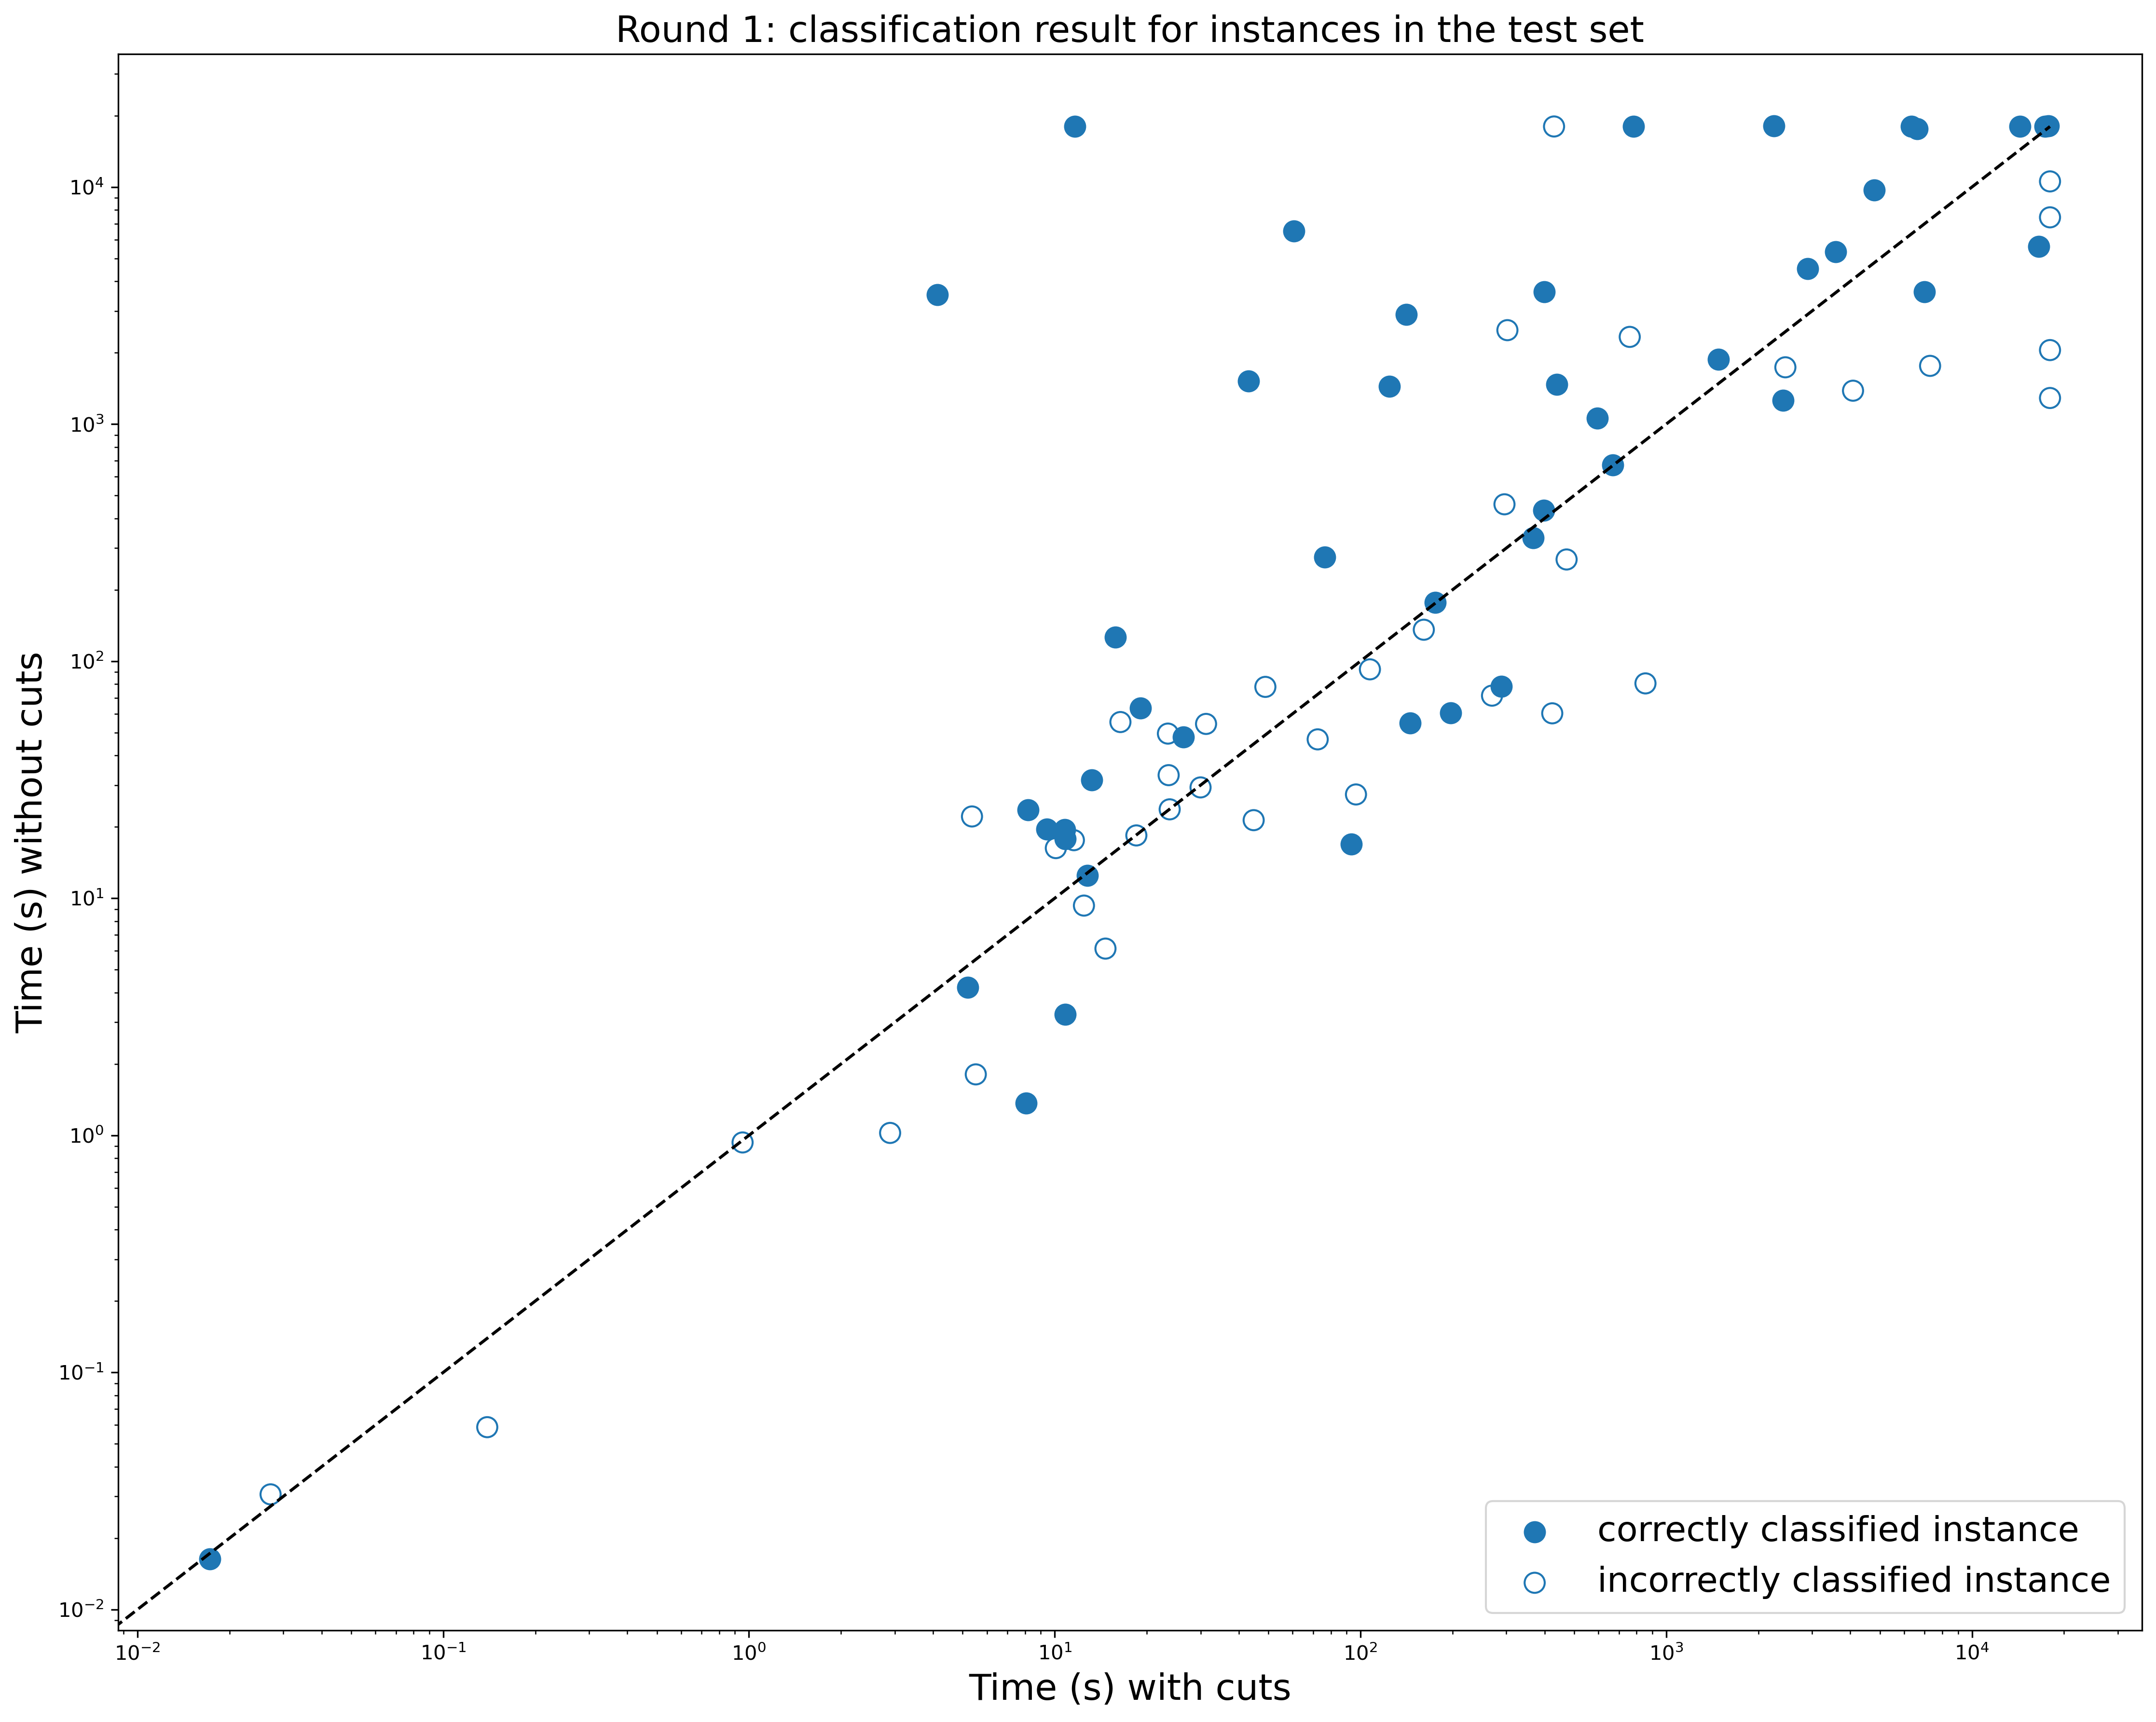

<Figure size 432x288 with 0 Axes>

In [349]:
## Plot of the distribution of instances in train and test
minx = 0
maxx = 18000

plt.figure(figsize=(15,12), dpi=300)

# plt.scatter(x=correct_train['TIME W/ CUTS'], y=correct_train['TIME W/O CUTS'], marker='X', facecolor = 'green', s=100, 
#             edgecolors='g', label = 'correct-train')
# plt.scatter(x=incorrect_train['TIME W/ CUTS'], y=incorrect_train['TIME W/O CUTS'], marker='X', facecolor = 'none', s=100, 
#             edgecolors='g', label = 'incorrect-train')

plt.scatter(x=correct_test['TIME W/ CUTS'], y=correct_test['TIME W/O CUTS'],  marker='o', facecolor = 'tab:blue', s=100, 
            edgecolors='tab:blue', 
            label = 'correctly classified instance')
plt.scatter(x=incorrect_test['TIME W/ CUTS'], y=incorrect_test['TIME W/O CUTS'],  marker='o', facecolor = 'none', s=100, 
            edgecolors='tab:blue',
           label = 'incorrectly classified instance')



# plt.legend(["train" , "test"], loc='lower right', fontsize="xx-large")
plt.legend(loc='lower right', fontsize="xx-large")

plt.plot(range(int(minx),int(maxx)),range(int(minx),int(maxx)),'--', color='black')

plt.title('Round 1: classification result for instances in the test set', fontsize=18)
plt.xlabel('Time (s) with cuts', fontsize=18)
plt.ylabel('Time (s) without cuts', fontsize=18)



fig = plt.gcf()

ax_list=fig.axes
ax=ax_list[0]
ax.set_xscale("log")
ax.set_yscale("log")
plt.tight_layout()
plt.show()
plt.draw()
fname = "experiment_2_scatter"
fig.savefig(fname, dpi=300)